# 5.5. Accelerating Python code with Cython

In [1]:
import numpy as np

In [2]:
size = 400
iterations = 100

In [3]:
%load_ext cython

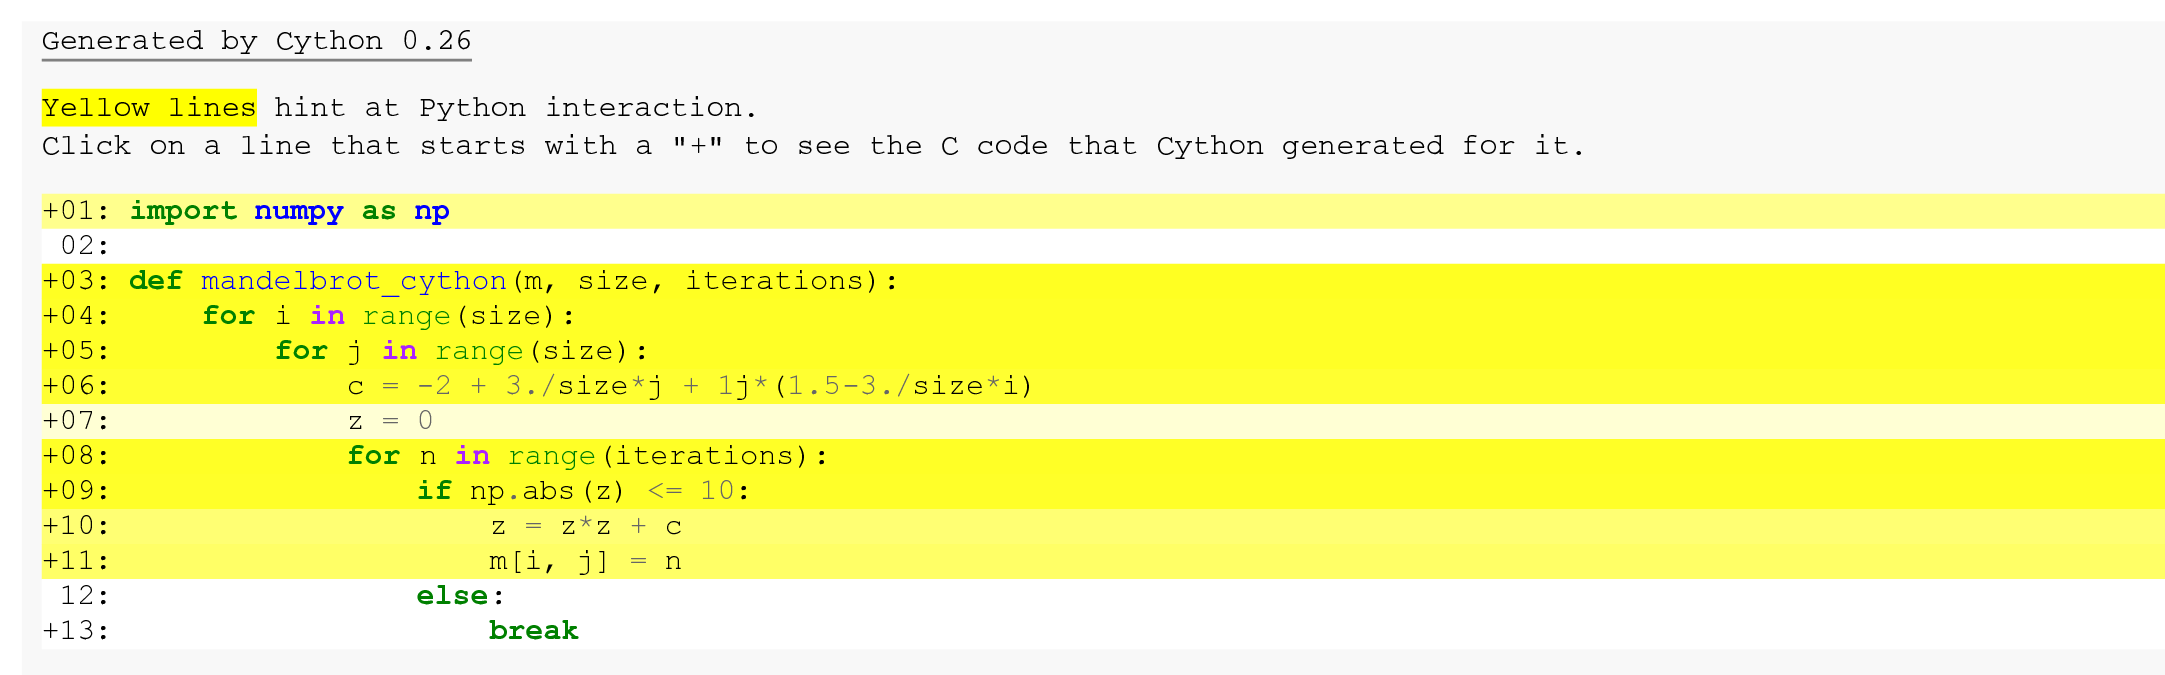

In [4]:
%%cython -a
import numpy as np

def mandelbrot_cython(m, size, iterations):
    for i in range(size):
        for j in range(size):
            c = -2 + 3./size*j + 1j*(1.5-3./size*i)
            z = 0
            for n in range(iterations):
                if np.abs(z) <= 10:
                    z = z*z + c
                    m[i, j] = n
                else:
                    break

In [5]:
s = (size, size)

In [6]:
%%timeit -n1 -r1 m = np.zeros(s, dtype=np.int32)
mandelbrot_cython(m, size, iterations)

4.52 s ± 0 ns per loop (mean ± std. dev. of 1 run,
    1 loop each)


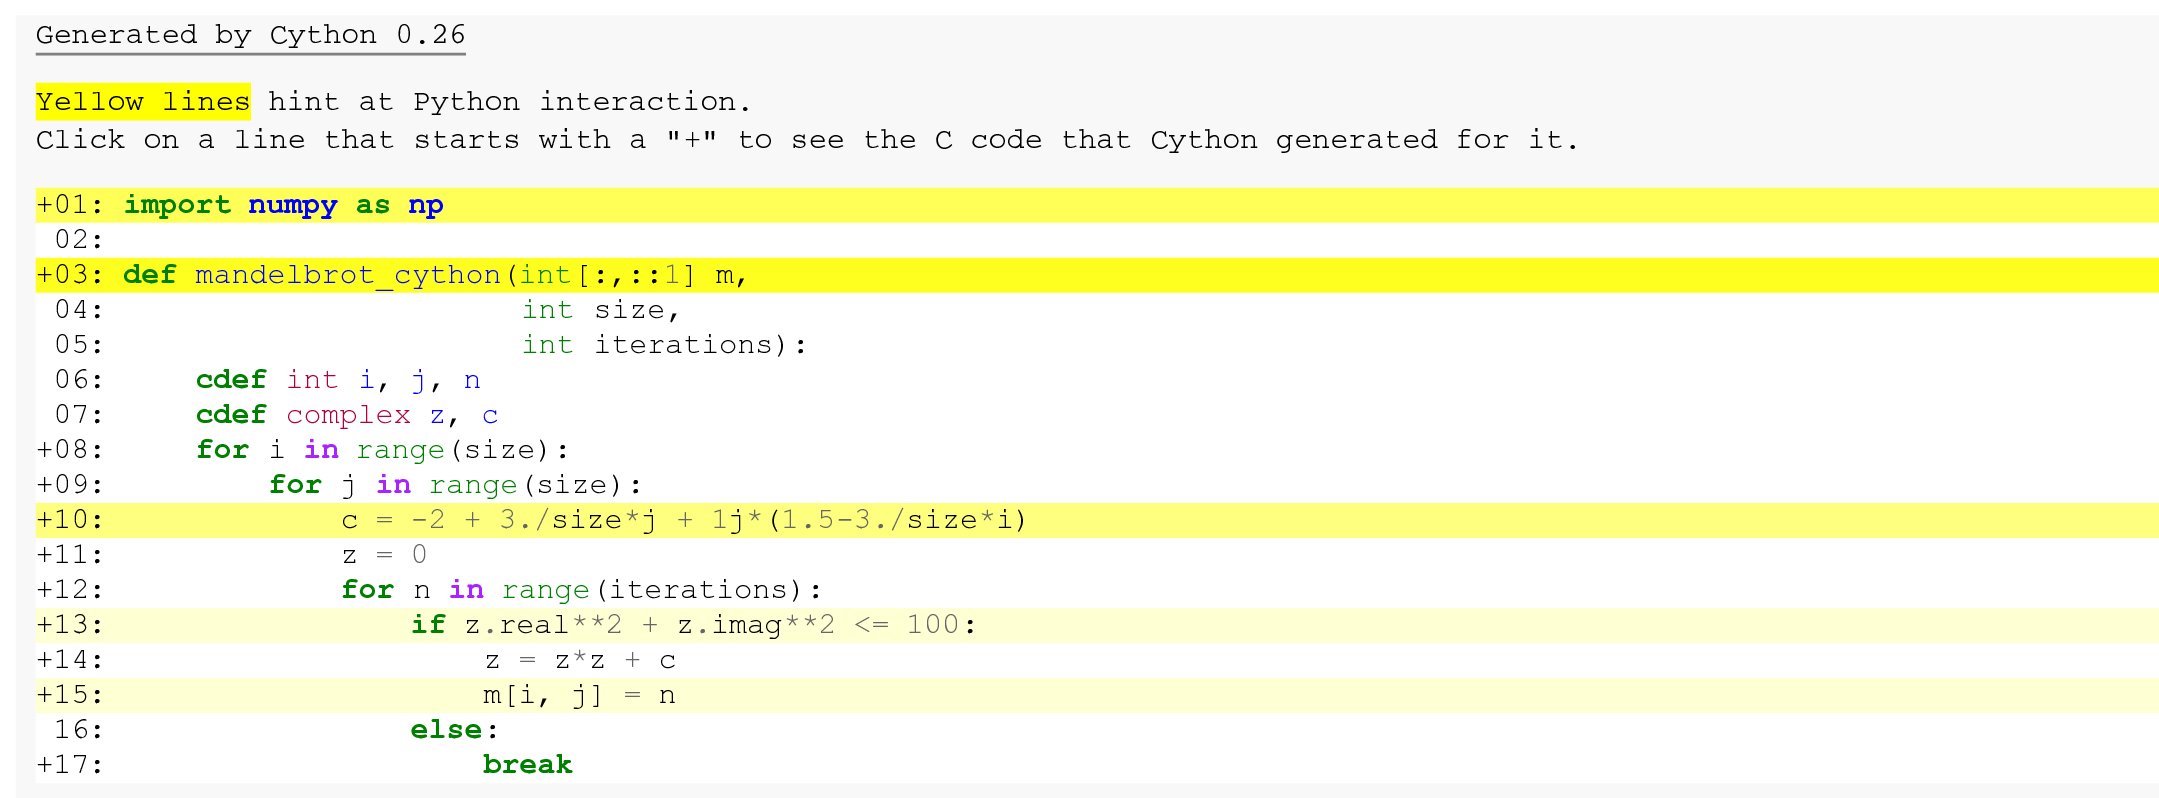

In [7]:
%%cython -a
import numpy as np

def mandelbrot_cython(int[:,::1] m,
                      int size,
                      int iterations):
    cdef int i, j, n
    cdef complex z, c
    for i in range(size):
        for j in range(size):
            c = -2 + 3./size*j + 1j*(1.5-3./size*i)
            z = 0
            for n in range(iterations):
                if z.real**2 + z.imag**2 <= 100:
                    z = z*z + c
                    m[i, j] = n
                else:
                    break

In [8]:
%%timeit -n1 -r1 m = np.zeros(s, dtype=np.int32)
mandelbrot_cython(m, size, iterations)

12.7 ms ± 0 ns per loop (mean ± std. dev. of 1 run,
    1 loop each)
